In [1]:
import sys
import pandas as pd

parent_dir = '/home/sei/tetrahedron_pair_ML'
sys.path.append(parent_dir)

n = 800000
tetrahedron_dataset = pd.read_csv('/home/sei/tetrahedron_pair_ML/data/processed/train/train_data.csv')

def has_t2_columns(df):
    """Check if the dataframe contains T2 columns"""
    return any(col.startswith('T2_') for col in df.columns)

### Dataset Structure:

In [2]:
tetrahedron_dataset.head()

,T1_v1_x,T1_v1_y,T1_v1_z,T1_v2_x,T1_v2_y,T1_v2_z,T1_v3_x,T1_v3_y,T1_v3_z,T1_v4_x,...,T2_v2_y,T2_v2_z,T2_v3_x,T2_v3_y,T2_v3_z,T2_v4_x,T2_v4_y,T2_v4_z,IntersectionVolume,HasIntersection
0,0.265876,-0.373026,-0.026015,-0.676031,0.108296,-0.036375,0.563265,0.297223,-0.011337,-0.153109,...,0.322689,-0.554563,-0.565312,0.131479,-0.162576,-0.236296,0.298828,0.016506,0.0,0
1,0.463843,0.249892,-0.012110,-0.400863,-0.015803,-0.044020,0.241863,-0.354132,0.009295,-0.304843,...,-0.200692,0.477439,0.388428,0.420212,0.259802,0.377189,-0.277284,-0.100307,0.0,0
2,0.602342,-0.162353,0.009763,-0.381582,-0.187405,-0.014323,-0.541042,0.099544,0.014868,0.320283,...,0.148717,0.129571,-0.199799,-0.230346,0.565711,0.232566,0.131746,0.719401,0.0,0
3,-0.128147,-0.030053,0.116032,0.336373,-0.152836,-0.028695,0.165117,0.215130,-0.015015,-0.373343,...,-0.343216,-0.161220,0.535462,-0.083276,-0.389081,0.390323,-0.131505,-0.515577,0.0,0
4,0.681043,-0.004143,0.024235,-0.341774,-0.362354,0.049904,-0.275172,0.462064,0.019902,-0.064097,...,-0.182484,0.738343,-0.280088,-0.428132,0.350500,0.442107,-0.114500,0.029738,0.0,0


- **Tetrahedrons:**
  - Each entry includes two tetrahedrons.
  - Each tetrahedron has four vertices.
  - Each vertex is defined by three coordinates (x, y, z).

- **Features:**
  - There are 12 features per tetrahedron, leading to 24 features total.
  - Column names follow the pattern `Tₜ_Vᵥ_α`, where:
    - `ₜ` = Tetrahedron number (1 or 2)
    - `ᵥ` = Vertex number (1 to 4)
    - `α` = Coordinate axis (x, y, or z)
  - Coordinates are normalized between 0 and 1.
  - Each coordinate is randomly generated through a i.i.d process.

- **Output Variables:**
  - **Intersection Status:**
    - Stored in the "intersection_status" column.
    - Values: `0` (no intersection) or `1` (intersection).
  - **Intersection Volume:**
    - Stored in the "intersection_volume" column.
    - Value is a non-negative real number.

### Input and Output Spaces:

- **Input Space:**
  - Represented as a vector in $\mathbb{R}^{24}$, where each coordinate is within the range $[0, 1]$.

- **Output Space:**
  - $\{0, 1\}$ for "HasIntersection".
  - $\mathbb{R}^{\geq 0}$ for "IntersectionVolume"

### Statistics


In [3]:
tetrahedron_dataset.describe()

,T1_v1_x,T1_v1_y,T1_v1_z,T1_v2_x,T1_v2_y,T1_v2_z,T1_v3_x,T1_v3_y,T1_v3_z,T1_v4_x,...,T2_v2_y,T2_v2_z,T2_v3_x,T2_v3_y,T2_v3_z,T2_v4_x,T2_v4_y,T2_v4_z,IntersectionVolume,HasIntersection
count,800000.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,800000.000000,800000.000000,...,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000
mean,0.000459,-0.000255,-8.669871e-06,-0.000322,0.000172,1.440021e-05,0.000088,0.000049,-0.000136,-0.000225,...,0.000342,0.000092,-0.000374,-0.000169,0.000121,-0.000119,-0.000423,0.000113,1349.992658,0.570000
std,0.358166,0.206576,8.481536e-02,0.362520,0.206752,8.477949e-02,0.359842,0.207092,0.084700,0.346883,...,0.321495,0.300717,0.316611,0.319969,0.300710,0.312623,0.324135,0.326643,2679.073960,0.495076
min,-1.010288,-0.715028,-5.449694e-01,-1.045788,-0.731886,-5.259926e-01,-0.976596,-0.746468,-0.513885,-1.005454,...,-1.233539,-1.227816,-1.253446,-1.136288,-1.133397,-1.155172,-1.176689,-1.254902,0.000000,0.000000
25%,-0.297558,-0.144921,-3.617899e-02,-0.306040,-0.144846,-3.553776e-02,-0.301638,-0.145398,-0.035961,-0.279948,...,-0.229476,-0.179261,-0.233064,-0.228268,-0.180527,-0.227386,-0.233404,-0.222569,0.000000,0.000000
50%,0.000651,-0.000116,-7.040799e-07,0.000010,0.000112,5.494803e-08,-0.000668,-0.000232,-0.000005,-0.000002,...,0.000619,0.000006,-0.000544,-0.000784,0.000034,0.000126,-0.000371,0.000019,0.000000,1.000000
75%,0.298973,0.144454,3.623845e-02,0.305457,0.145206,3.569081e-02,0.301629,0.145647,0.035637,0.279521,...,0.230783,0.179173,0.232489,0.227654,0.180502,0.226587,0.232414,0.223156,740.692048,1.000000
max,0.996912,0.713082,5.511094e-01,1.009104,0.764151,5.553674e-01,1.019591,0.741769,0.544373,1.011144,...,1.163642,1.244455,1.129746,1.195014,1.164051,1.149933,1.210986,1.227152,9999.988745,1.000000


#### Class Balance

In [4]:
total_entries = len(tetrahedron_dataset)
status_0_count = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 0].shape[0]
status_1_count = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 1].shape[0]

percentage_status_0 = (status_0_count / total_entries) * 100
percentage_status_1 = (status_1_count / total_entries) * 100

print(f"Percentage of entries with HasIntersection = 0: {percentage_status_0:.2f}%")
print(f"Percentage of entries with HasIntersection = 1: {percentage_status_1:.2f}%")

Percentage of entries with HasIntersection = 0: 43.00%
Percentage of entries with HasIntersection = 1: 57.00%


#### Coordinates precision

In [5]:
# Extract all coordinate columns
coordinate_columns = [col for col in tetrahedron_dataset.columns if '_v' in col]

def calculate_precision(value):
    value_str = str(value)
    if '.' in value_str:
        return len(value_str.split('.')[1])
    else:
        return 0

max_precision = 0
min_precision = float('inf')

for col in coordinate_columns:
    col_precision = tetrahedron_dataset[col].map(calculate_precision)
    max_precision = max(max_precision, col_precision.max())
    min_precision = min(min_precision, col_precision.min())

print(f"Min coordinate precision in the dataset: {min_precision} decimal places")
print(f"Max coordinate precision in the dataset: {max_precision} decimal places")

Min coordinate precision in the dataset: 1 decimal places
Max coordinate precision in the dataset: 12 decimal places


#### Coordinates distribution

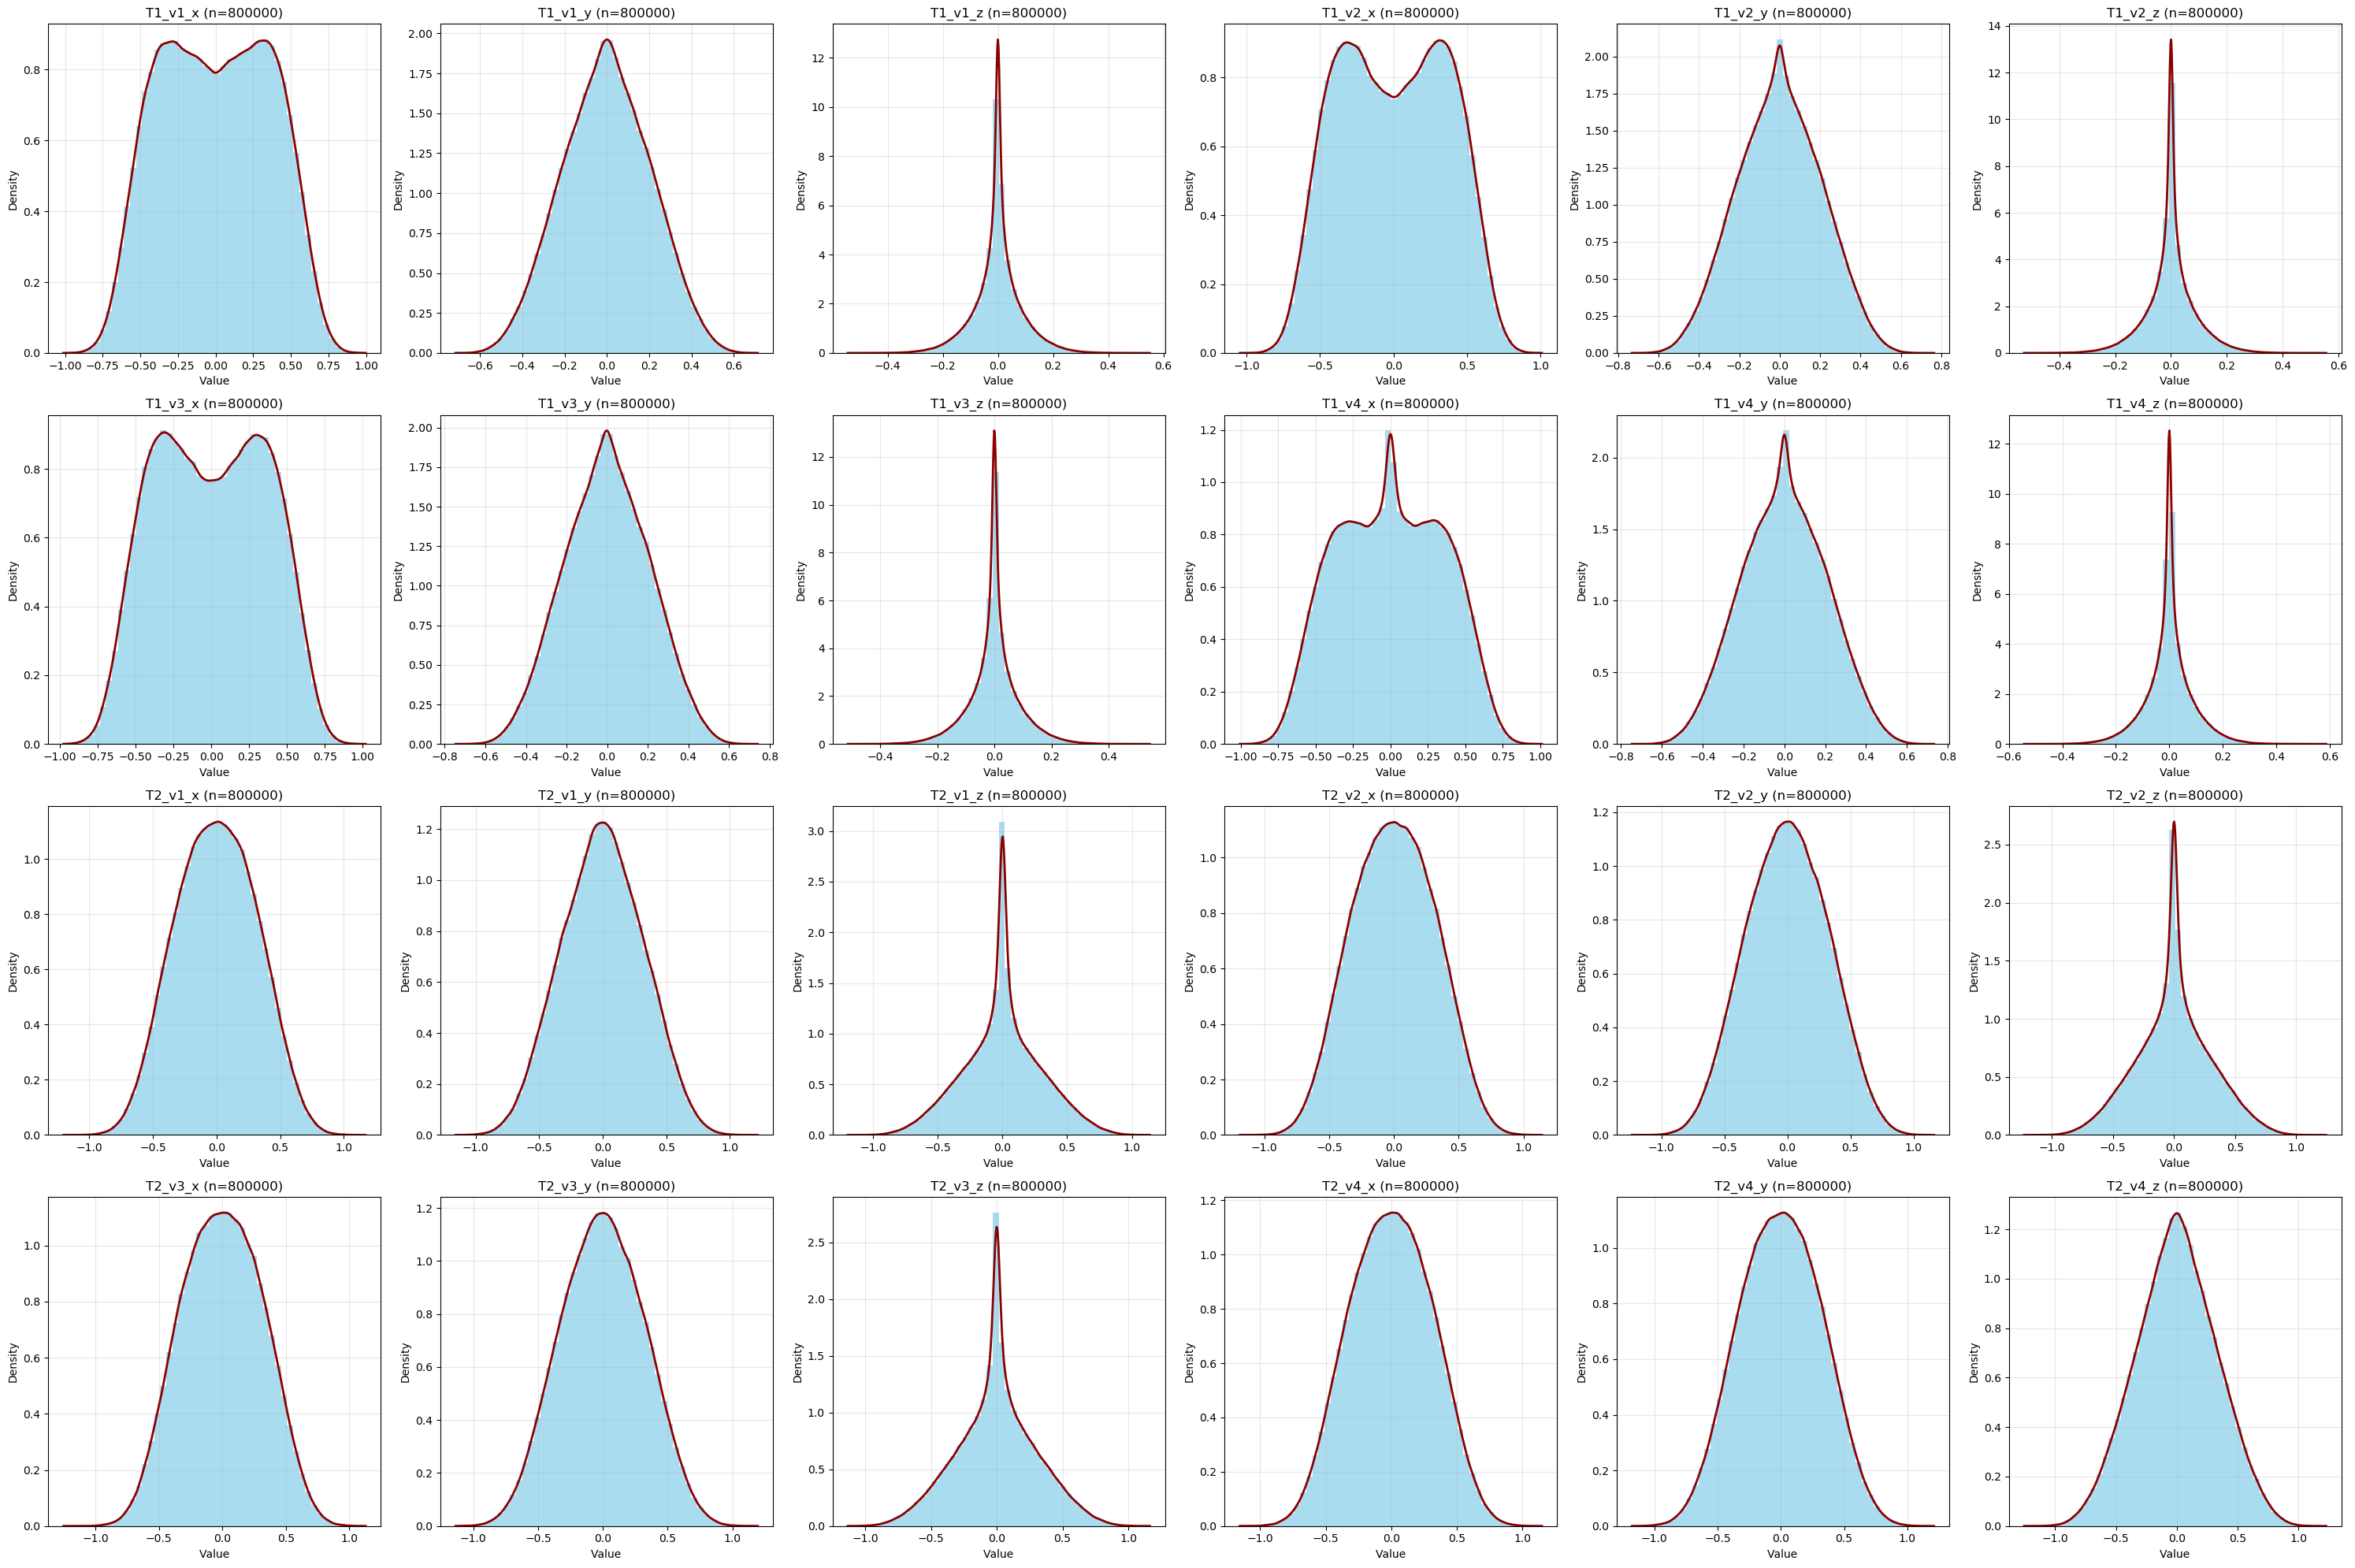

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from scipy.stats import gaussian_kde

# Define tetrahedrons, points, and coordinates
tetrahedrons = ['T1']
if has_t2_columns(tetrahedron_dataset):
    tetrahedrons.append('T2')
points = ['v1', 'v2', 'v3', 'v4']
coordinates = ['x', 'y', 'z']

# Build the list of column names in the order: T1_v1_x, T1_v1_y, T1_v1_z, ..., T2_v4_z
columns = [f'{tetra}_{point}_{coord}' for tetra in tetrahedrons for point in points for coord in coordinates]

# Adjust your subplot layout based on number of columns
ncols = min(6, len(columns))
nrows = (len(columns) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 5*nrows))
axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]  # Handle single plot case


for ax, col in zip(axes, columns):
    # Extract the data for the current column from the DataFrame
    data = np.ravel(tetrahedron_dataset[col].to_numpy(copy=False))
    
    # Plot the histogram (normalized to density)
    ax.hist(data, bins=50, color='skyblue', density=True, alpha=0.7)
    
    # Compute and plot the Kernel Density Estimate
    kde = gaussian_kde(data)
    x_vals = np.linspace(data.min(), data.max(), 500)
    ax.plot(x_vals, kde(x_vals), color='darkred', lw=2)
    
    # Formatting
    ax.set_title(f'{col} (n={len(data)})', fontsize=12)
    ax.set_xlabel('Value', fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


#### Tetrahedron volume distribution

In [7]:
### Get Data ###
import src.GeometryUtils as gu


def extract_t1_vertices(row):
    return torch.tensor([
        [row['T1_v1_x'], row['T1_v1_y'], row['T1_v1_z']],
        [row['T1_v2_x'], row['T1_v2_y'], row['T1_v2_z']],
        [row['T1_v3_x'], row['T1_v3_y'], row['T1_v3_z']],
        [row['T1_v4_x'], row['T1_v4_y'], row['T1_v4_z']]
    ])

def extract_t2_vertices(row):
    return torch.tensor([
        [row['T2_v1_x'], row['T2_v1_y'], row['T2_v1_z']],
        [row['T2_v2_x'], row['T2_v2_y'], row['T2_v2_z']],
        [row['T2_v3_x'], row['T2_v3_y'], row['T2_v3_z']],
        [row['T2_v4_x'], row['T2_v4_y'], row['T2_v4_z']]
    ])

t1_volumes = []
t2_volumes = []

for _, row in tetrahedron_dataset.iterrows():
    t1_vertices = extract_t1_vertices(row)
    volume = gu.calculate_tetrahedron_volume(t1_vertices)
    t1_volumes.append(volume.item())
    
    if has_t2_columns(tetrahedron_dataset):
        t2_vertices = extract_t2_vertices(row)
        volume = gu.calculate_tetrahedron_volume(t2_vertices)
        t2_volumes.append(volume.item())

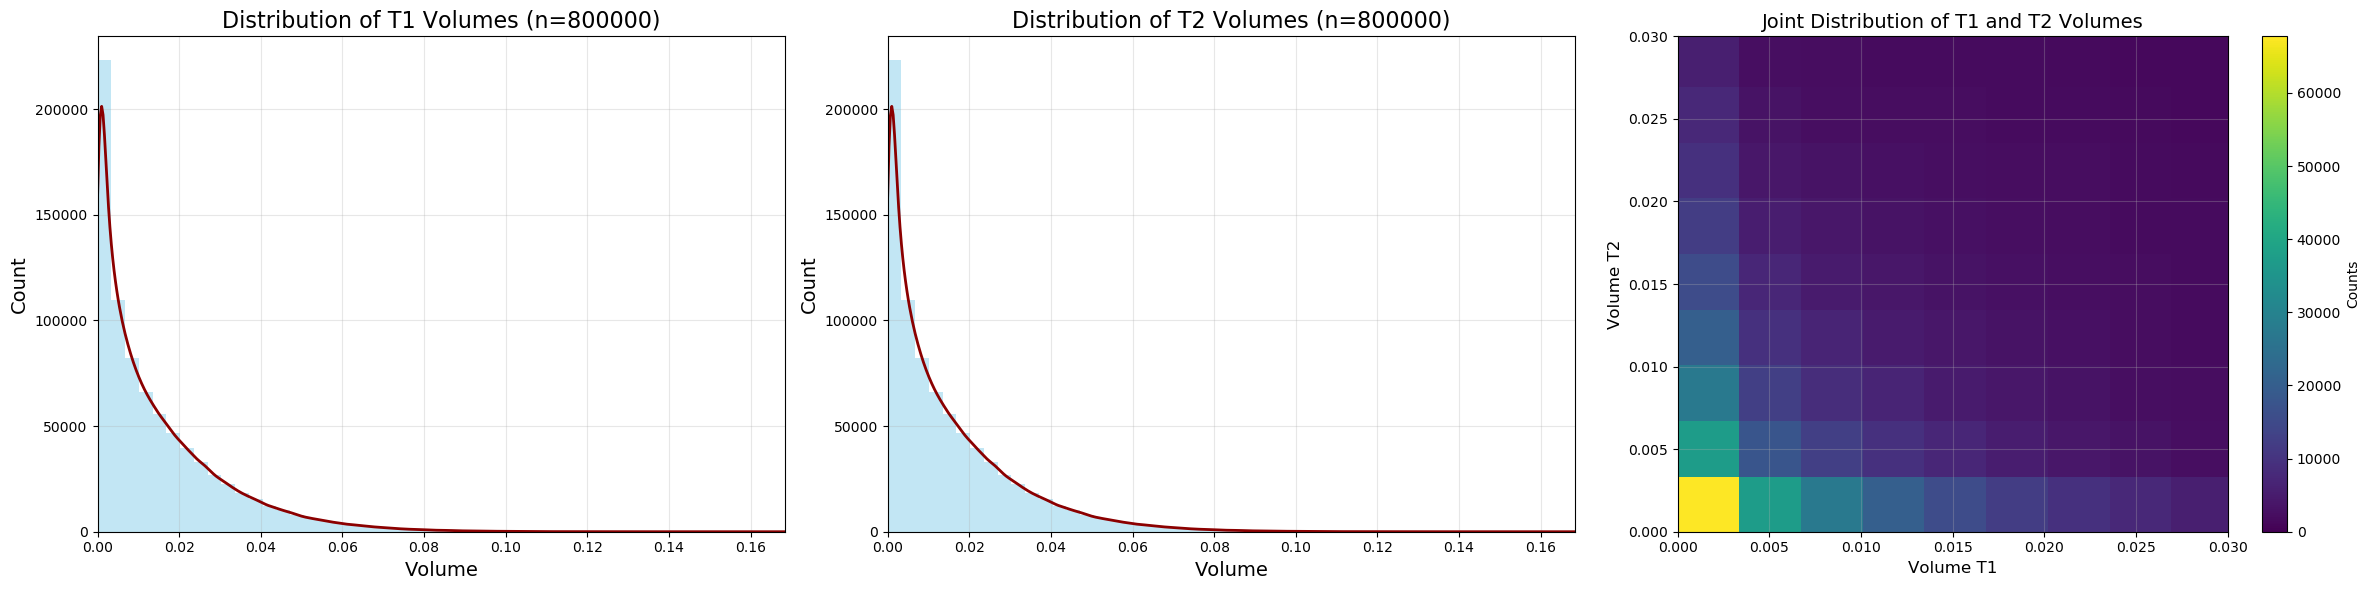

In [8]:
volumes_t1 = np.array(t1_volumes).ravel()
volumes_t2 = np.array(t2_volumes).ravel()

if has_t2_columns(tetrahedron_dataset):
    # Create two subplots (original code)
    fig, axes = plt.subplots(1, 3, figsize=(24, 6))

    # Plot for T1
    counts, bins, _ = axes[0].hist(volumes_t1, bins=50, color='skyblue', alpha=0.5)
    kde = gaussian_kde(volumes_t1)
    x = np.linspace(volumes_t1.min(), volumes_t1.max(), 500)
    axes[0].plot(x, kde(x) * len(volumes_t1) * (bins[1] - bins[0]), color='darkred', lw=2)
    axes[0].set_title(f'Distribution of T1 Volumes (n={len(volumes_t1)})', fontsize=16)
    axes[0].set_xlabel('Volume', fontsize=14)
    axes[0].set_ylabel('Count', fontsize=14)
    axes[0].set_xlim(0, volumes_t1.max())
    axes[0].grid(True, alpha=0.3)

    # Plot for T2
    counts, bins, _ = axes[1].hist(volumes_t2, bins=50, color='skyblue', alpha=0.5)
    kde = gaussian_kde(volumes_t2)
    x = np.linspace(volumes_t2.min(), volumes_t2.max(), 500)
    axes[1].plot(x, kde(x) * len(volumes_t2) * (bins[1] - bins[0]), color='darkred', lw=2)
    axes[1].set_title(f'Distribution of T2 Volumes (n={len(volumes_t2)})', fontsize=16)
    axes[1].set_xlabel('Volume', fontsize=14)
    axes[1].set_ylabel('Count', fontsize=14)
    axes[1].set_xlim(0, volumes_t2.max())
    axes[1].grid(True, alpha=0.3)


    # --- Joint Distribution Plot ---
    hist2d_bins = 50
    H, xedges, yedges = np.histogram2d(volumes_t1, volumes_t2, bins=hist2d_bins)

    # Transpose H because pcolormesh expects (Y, X) dimensions
    H = H.T

    X, Y = np.meshgrid(xedges, yedges)
    pcm = axes[2].pcolormesh(X, Y, H, cmap='viridis', shading='auto')
    axes[2].set_title('Joint Distribution of T1 and T2 Volumes', fontsize=14)
    axes[2].set_xlabel('Volume T1', fontsize=12)
    axes[2].set_ylabel('Volume T2', fontsize=12)
    axes[2].set_xlim(0, 0.03) 
    axes[2].set_ylim(0, 0.03) 

    fig.colorbar(pcm, ax=axes[2], label='Counts')
    axes[2].grid(True, alpha=0.3)
else:
    # Create a single plot for T1 only - handle full range with log scale
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot 1: Linear scale histogram for all data
    counts, bins, _ = ax1.hist(volumes_t1, bins=100, color='skyblue', alpha=0.7)
    ax1.set_title(f'Distribution of T1 Volumes (Linear Scale)\nn={len(volumes_t1)} samples', fontsize=14)
    ax1.set_xlabel('Volume', fontsize=12)
    ax1.set_ylabel('Count', fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
    ax1.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    
    # Plot 2: Log scale for better visualization of distribution shape
    # Separate zeros and non-zeros
    volumes_nonzero = volumes_t1[volumes_t1 > 0]
    zero_count = len(volumes_t1) - len(volumes_nonzero)
    
    if len(volumes_nonzero) > 0:
        # Use log-spaced bins for better distribution
        log_bins = np.logspace(np.log10(volumes_nonzero.min()), 
                              np.log10(volumes_nonzero.max()), 
                              50)
        
        ax2.hist(volumes_nonzero, bins=log_bins, color='lightcoral', alpha=0.7)
        ax2.set_xscale('log')
        ax2.set_yscale('log')
        ax2.set_title(f'T1 Volumes (Log-Log Scale)\nNon-zero: {len(volumes_nonzero)}, Zeros: {zero_count}', fontsize=14)
        ax2.set_xlabel('Volume (log scale)', fontsize=12)
        ax2.set_ylabel('Count (log scale)', fontsize=12)
        ax2.grid(True, alpha=0.3)
    
plt.tight_layout()
plt.show()

#### Intersection volume distribution

Intersecting samples: 216,000 (27.0%)
Volume range: 0.000000 to 0.010000


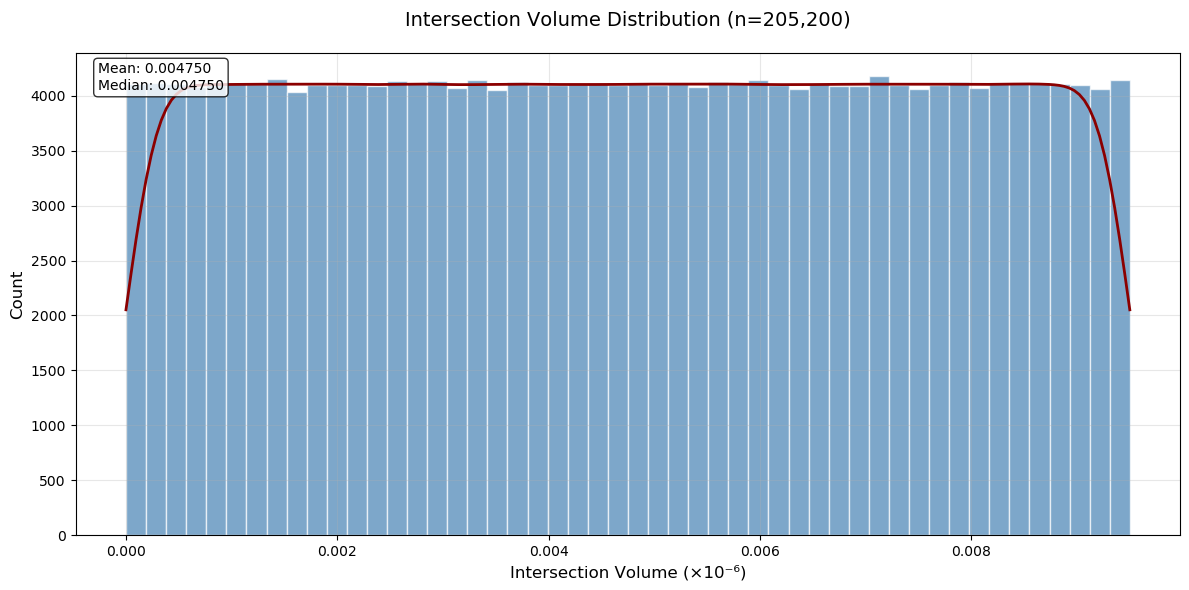

Key percentiles: 50th=0.005000, 95th=0.009500, 99th=0.009900


In [9]:
# Intersection Volume Distribution
intersecting_cases = tetrahedron_dataset[tetrahedron_dataset['IntersectionVolume'] > 0]

if len(intersecting_cases) > 0:
    scaling_factor = 1000000
    volumes = intersecting_cases['IntersectionVolume'].to_numpy() / scaling_factor
    
    print(f"Intersecting samples: {len(volumes):,} ({len(volumes)/len(tetrahedron_dataset)*100:.1f}%)")
    print(f"Volume range: {volumes.min():.6f} to {volumes.max():.6f}")
    
    # Single clean plot
    plt.figure(figsize=(12, 6))
    
    # Use 95th percentile to handle outliers
    max_vol = np.percentile(volumes, 95)
    volumes_clean = volumes[volumes <= max_vol]
    
    # Simple histogram
    plt.hist(volumes_clean, bins=50, color='steelblue', alpha=0.7, edgecolor='white')
    
    # Add KDE for smoothness
    kde = gaussian_kde(volumes_clean)
    x = np.linspace(0, max_vol, 200)
    plt.plot(x, kde(x) * len(volumes_clean) * (max_vol/50), 'darkred', lw=2)
    
    # Clean formatting
    plt.title(f'Intersection Volume Distribution (n={len(volumes_clean):,})', fontsize=14, pad=20)
    plt.xlabel('Intersection Volume (×10⁻⁶)', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(alpha=0.3)
    

    plt.text(0.02, 0.98, f'Mean: {volumes_clean.mean():.6f}\nMedian: {np.median(volumes_clean):.6f}', 
             transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Essential percentiles
    print(f"Key percentiles: 50th={np.percentile(volumes, 50):.6f}, "
          f"95th={np.percentile(volumes, 95):.6f}, "
          f"99th={np.percentile(volumes, 99):.6f}")

else:
    print("No intersecting cases found")
    plt.figure(figsize=(8, 5))
    plt.bar(['No Intersection', 'Intersection'], 
            [len(tetrahedron_dataset), 0], 
            color=['lightgray', 'steelblue'])
    plt.title('Intersection Status Distribution')
    plt.ylabel('Count')
    plt.show()